# Decision Tree Classifier – SmartHealth_T2D
This notebook trains and evaluates a Decision Tree model on the preprocessed UCI diabetes dataset.

In [22]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/ucidata.csv")

# Encode categorical values
df_encoded = df.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'Positive': 1, 'Negative': 0})
df_encoded.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-22-fe5c22bb524f>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'Positive': 1, 'Negative': 0})


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [23]:
# Define features and target
X = df_encoded.drop("class", axis=1)
y = df_encoded["class"]


## Train-Test Split  
We split the dataset into **80% training** and **20% testing**. A random seed (`random_state=42`) ensures reproducibility.


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Scale features (optional for Decision Trees)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predict
y_pred = dt_model.predict(X_test_scaled)
y_proba = dt_model.predict_proba(X_test_scaled)[:, 1]


In [31]:
# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Accuracy: 0.9519230769230769

Confusion Matrix:
 [[33  0]
 [ 5 66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104

ROC AUC Score: 0.9647887323943662


### Splitting Formula Used by Decision Tree

This model uses **Gini Impurity** to determine the best splits.

\[
Gini(D) = 1 - \sum_{i=1}^C p_i^2
\]

Where:
- \( D \): current node (dataset)
- \( C \): number of classes (e.g., Positive, Negative)
- \( p_i \): proportion of class \( i \) in node \( D \)

Lower Gini = purer node. The tree selects the feature/threshold that most reduces impurity from parent to child nodes.


In [32]:
# Use Gini Impurity to determine the best splits.
# Splitting formula used by Decision Tree
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

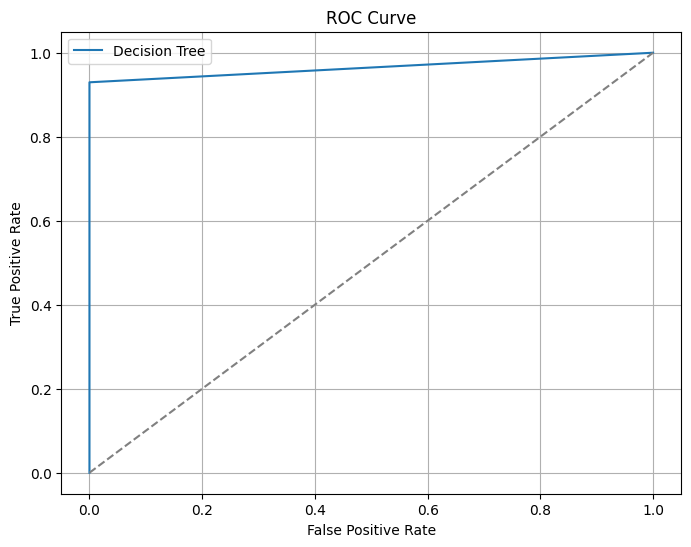

In [33]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Decision Tree')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


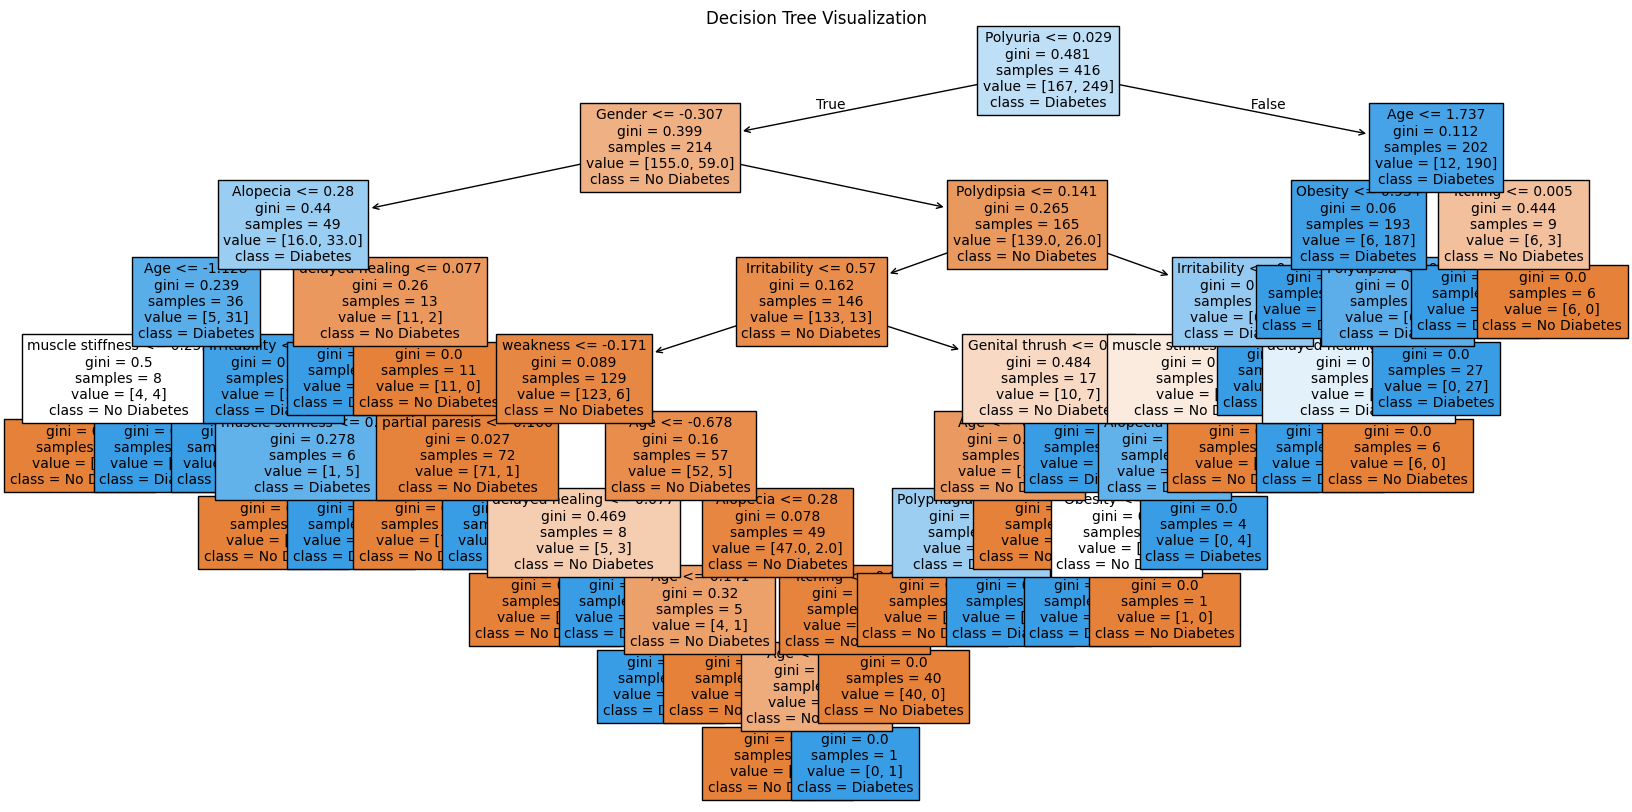

In [34]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()